In [1]:
import pandas as pd 
import seaborn as sns

import warnings  
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

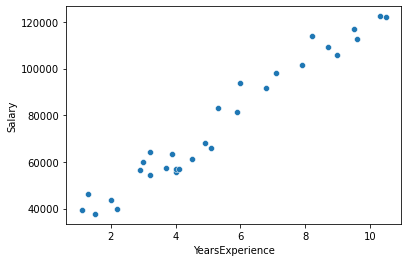

In [7]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])

## Correlation

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

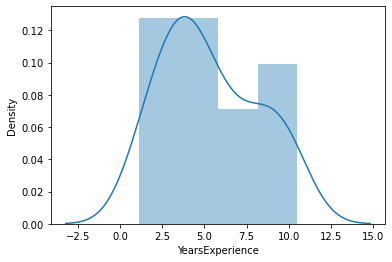

In [9]:
sns.distplot(data['YearsExperience'])


<AxesSubplot:xlabel='Salary', ylabel='Density'>

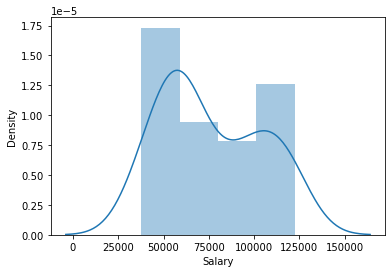

In [11]:
sns.distplot(data['Salary'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

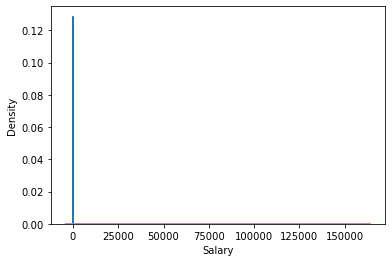

In [12]:
sns.distplot(data['YearsExperience'])
sns.distplot(data['Salary'])

## fitting the linerar model 

In [13]:
import statsmodels.formula.api as smf
model = smf.ols("data['YearsExperience']~data['Salary']",data = data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

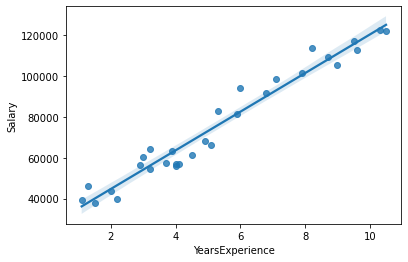

In [15]:
sns.regplot(x="YearsExperience",y="Salary",data=data)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     data['YearsExperience']   R-squared:                       0.957
Model:                                 OLS   Adj. R-squared:                  0.955
Method:                      Least Squares   F-statistic:                     622.5
Date:                     Sun, 20 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                             21:34:13   Log-Likelihood:                -26.168
No. Observations:                       30   AIC:                             56.34
Df Residuals:                           28   BIC:                             59.14
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.3832      0.327     -7.281      0.000      -3.054      -1.713
data['Salary']     0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
print(model.tvalues)

Intercept         -7.281283
data['Salary']    24.950094
dtype: float64


In [18]:
print(model.pvalues)

Intercept         6.300123e-08
data['Salary']    1.143068e-20
dtype: float64


In [19]:
model.rsquared,model.rsquared_adj  # 0.95% accuracy 

(0.9569566641435086, 0.9554194021486339)

In [21]:
import numpy as np
import statsmodels.api as sm

x= data['YearsExperience']
y= data['Salary']

## Log Transformation of X

In [23]:
x_log = np.log(data['YearsExperience'])

In [25]:
model = sm.OLS(y, x_log).fit()
predictions = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    8.06e-26
Time:                        21:58:03   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Log Transformation of Y

In [29]:
y_log = np.log(data['Salary'])

In [30]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    6.09e-12
Time:                        22:00:00   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience     1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## log transformation x & y

In [31]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                                inf
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:00:31   Log-Likelihood:                             inf
No. Observations:                  30   AIC:                                       -inf
Df Residuals:                      29   BIC:                                       -inf
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         1.0000          0        inf      0.000       1.000       1.000
==============================================================================
Omnibus:                      405.247   Durbin-Watson:                     nan
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.250
Skew:                           0.000   Prob(JB):                      0.00361
Kurtosis:                       0.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square Root Transformation of X

In [34]:
x_sqrt = np.sqrt(data['YearsExperience'])

In [36]:
model = sm.OLS(y, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    3.62e-30
Time:                        22:02:45   Log-Likelihood:                         -313.35
No. Observations:                  30   AIC:                                      628.7
Df Residuals:                      29   BIC:                                      630.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience   3.48e+04    670.056     51.932      0.000    3.34e+04    3.62e+04
==============================================================================
Omnibus:                        5.654   Durbin-Watson:                   0.734
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                1.849
Skew:                          -0.040   Prob(JB):                        0.397
Kurtosis:                       1.786   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square Root Transformation of Y

In [39]:
y_sqrt = np.sqrt(data['Salary'])

In [40]:
model = sm.OLS(y_sqrt, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                    2.12e-16
Time:                        22:03:34   Log-Likelihood:                         -175.75
No. Observations:                  30   AIC:                                      353.5
Df Residuals:                      29   BIC:                                      354.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience    43.7142      2.621     16.676      0.000      38.353      49.076
==============================================================================
Omnibus:                        2.437   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                1.859
Skew:                          -0.445   Prob(JB):                        0.395
Kurtosis:                       2.167   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Square Root Transformation of X & Y

In [42]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Salary   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.399e+32
Date:                Mon, 21 Nov 2022   Prob (F-statistic):                        0.00
Time:                        22:04:11   Log-Likelihood:                          848.62
No. Observations:                  30   AIC:                                     -1695.
Df Residuals:                      29   BIC:                                     -1694.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Salary         1.0000   8.45e-17   1.18e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                        3.709   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.157   Jarque-Bera (JB):                3.310
Skew:                          -0.753   Prob(JB):                        0.191
Kurtosis:                       2.382   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""